<a href="https://colab.research.google.com/github/Srikhanth14/Python_Data_Analysis_Projects/blob/main/Udemy_Course_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Introduction**

## The Udemy Course Analysis Project involves a comprehensive examination of data sourced from Udemy, a prominent online learning platform. The project aims to derive valuable insights and trends from this dataset, offering pertinent observations for both students and course creators within the Udemy ecosystem.

## **Import the Necessary Libraries**


In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Data Collection and Preprocessing**


In [133]:
# Load the dataset
df = pd.read_csv('udemy_courses.csv')

In [134]:
# Display the first five rows of the dataset
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [135]:
#Shape of the Dataset
print("No. Of Rows= ",df.shape[0])
print("No. Of Columns= ",df.shape[1])

No. Of Rows=  3678
No. Of Columns=  12


In [136]:
#Get some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [137]:
#checking for null values
df.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [138]:
#Checking for duplicated values
df.duplicated().sum()

6

In [139]:
#Dropping the duplicated Values
df.drop_duplicates(inplace=True)

In [140]:
df.duplicated().sum()

0

In [141]:
#Statistical Summary
df.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.672000e+03,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000
mean,6.758977e+05,66.102941,3190.586874,156.371460,40.140251,4.097603
std,3.430720e+05,61.035920,9488.105448,936.178649,50.417102,6.057830
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.077615e+05,20.000000,111.750000,4.000000,15.000000,1.000000
50%,6.876920e+05,45.000000,912.000000,18.000000,25.000000,2.000000
75%,9.608140e+05,95.000000,2548.750000,67.000000,46.000000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


In [142]:
df.describe(include="object")

,course_title,url,level,published_timestamp,subject
count,3672,3672,3672,3672,3672
unique,3663,3672,4,3672,4
top,Acoustic Blues Guitar Lessons,https://www.udemy.com/ultimate-investment-bank...,All Levels,2017-01-18T20:58:58Z,Web Development
freq,3,1,1925,1,1199


In [143]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [144]:
# Drop irrelevant features
df.drop(['course_id','url'], axis=1, inplace=True)

## **Exploratory Data Analysis (EDA)**


In [145]:
# Distribution of Courses based on Levels
df.level.value_counts()

All Levels            1925
Beginner Level        1268
Intermediate Level     421
Expert Level            58
Name: level, dtype: int64

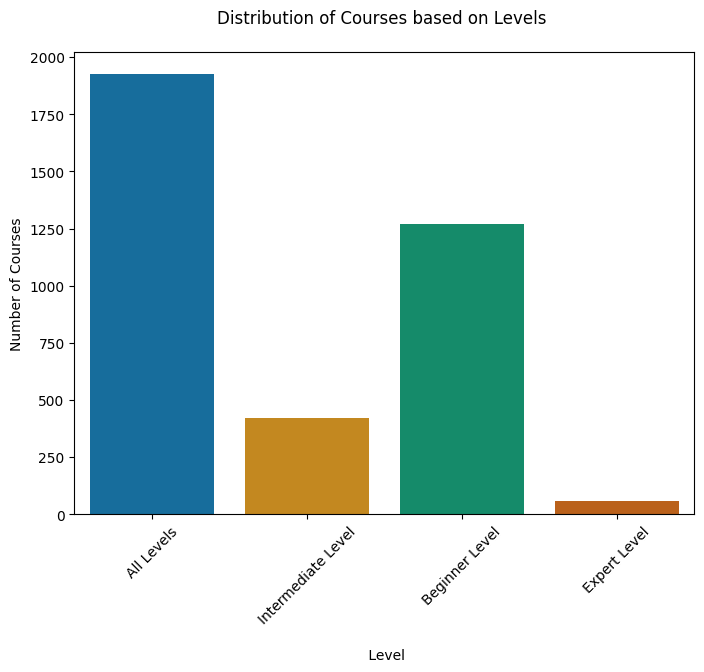

In [146]:
# Visualize the Different Course Levels
plt.figure(figsize=(8,6))
sns.countplot(x='level', data=df ,palette='colorblind')
plt.title("Distribution of Courses based on Levels \n")
plt.xlabel("\n Level")
plt.ylabel("Number of Courses")
plt.xticks(rotation=45)
plt.show()

In [147]:
# Number of reviews for each level
avg_rev_level = df.groupby('level')['num_reviews'].sum().reset_index()
avg_rev_level

,level,num_reviews
0,All Levels,403772
1,Beginner Level,129075
2,Expert Level,2333
3,Intermediate Level,39016


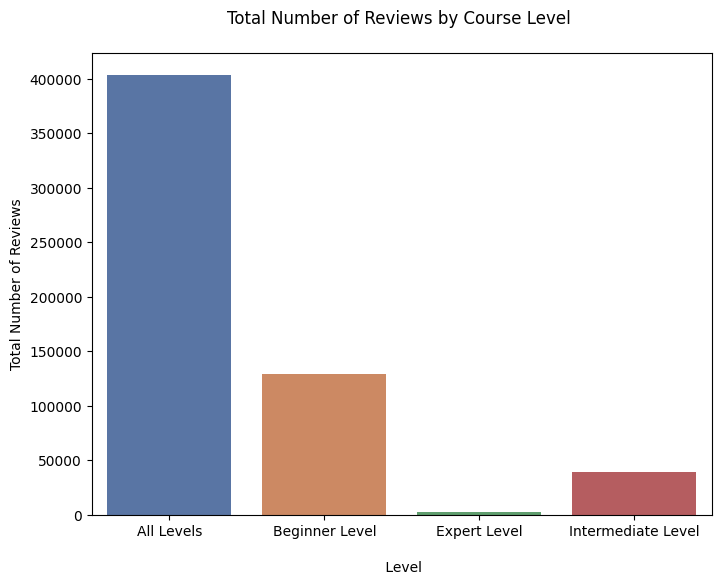

In [148]:
#Visualize Total No. of Reviews for each Level
plt.figure(figsize=(8,6))
sns.barplot(x='level', y='num_reviews', data=avg_rev_level, palette='deep')
plt.xlabel("\n Level")
plt.ylabel("Total Number of Reviews")
plt.title("Total Number of Reviews by Course Level \n")
plt.xticks(rotation=0)
plt.show()

In [149]:
# Distribution of Courses in each Subject
df.subject.value_counts()

Web Development        1199
Business Finance       1191
Musical Instruments     680
Graphic Design          602
Name: subject, dtype: int64

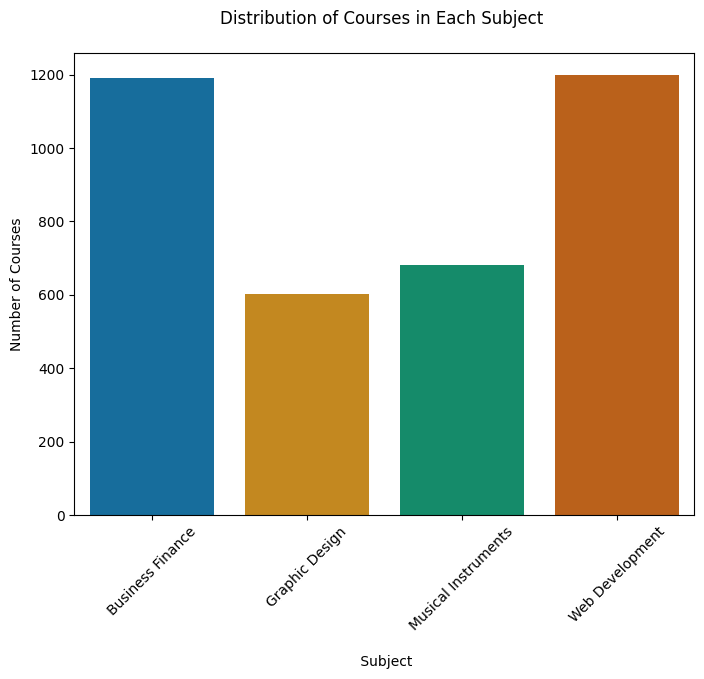

In [150]:
# Visualize the Total number of courses in each subject
plt.figure(figsize=(8,6))
sns.countplot(x='subject', data=df, palette='colorblind')
plt.title("Distribution of Courses in Each Subject \n")
plt.xlabel("\n Subject")
plt.ylabel("Number of Courses")
plt.xticks(rotation=45)
plt.show()

In [151]:
# Average price of courses for each subject
avg_price_subject = df.groupby('subject')['price'].mean().reset_index()
avg_price_subject

,subject,price
0,Business Finance,68.694374
1,Graphic Design,57.890365
2,Musical Instruments,49.558824
3,Web Development,77.035029


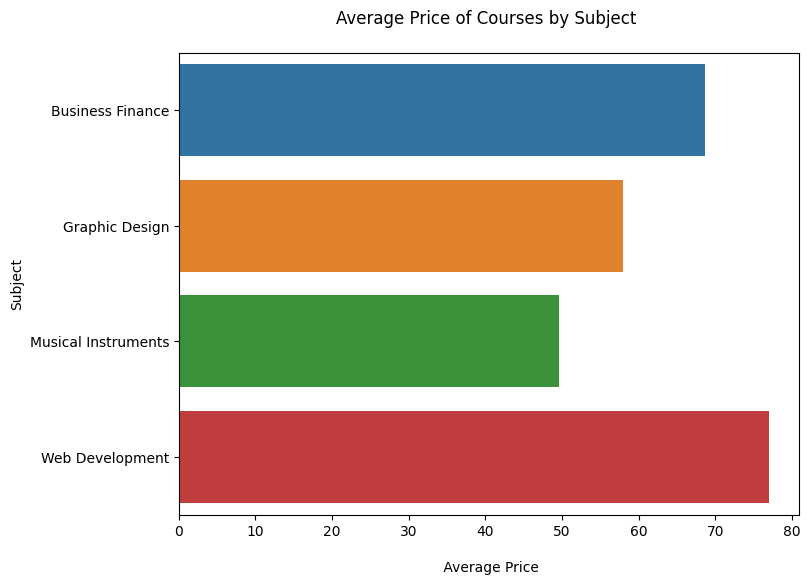

In [152]:
#Visualize the Average price for each Subject
plt.figure(figsize=(8,6))
sns.barplot(y='subject', x='price', data=avg_price_subject)
plt.ylabel("Subject")
plt.xlabel(" \n Average Price")
plt.title("Average Price of Courses by Subject \n")
plt.xticks(rotation=0)
plt.show()

In [153]:
# Distribution of paid and free courses
df['is_paid'].value_counts()

True     3362
False     310
Name: is_paid, dtype: int64

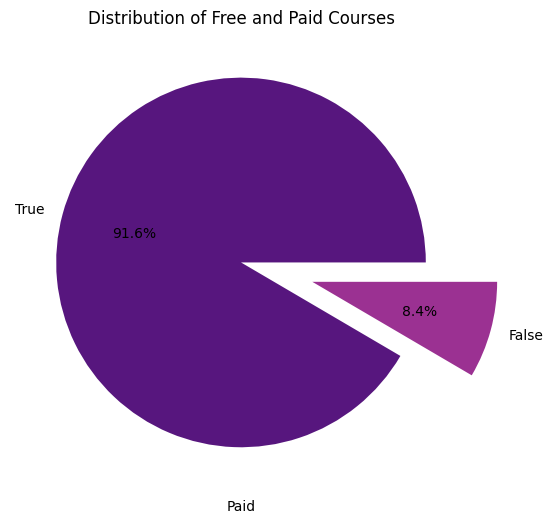

In [154]:
# Plot a pie chart for paid and free courses
plt.figure(figsize=(6, 6))
df['is_paid'].value_counts().plot.pie(autopct='%1.1f%%', explode=[0, 0.4], colors=['#57167E','#9B3192'])
plt.title("Distribution of Free and Paid Courses")
plt.xlabel("Paid")
plt.ylabel('')
plt.show()

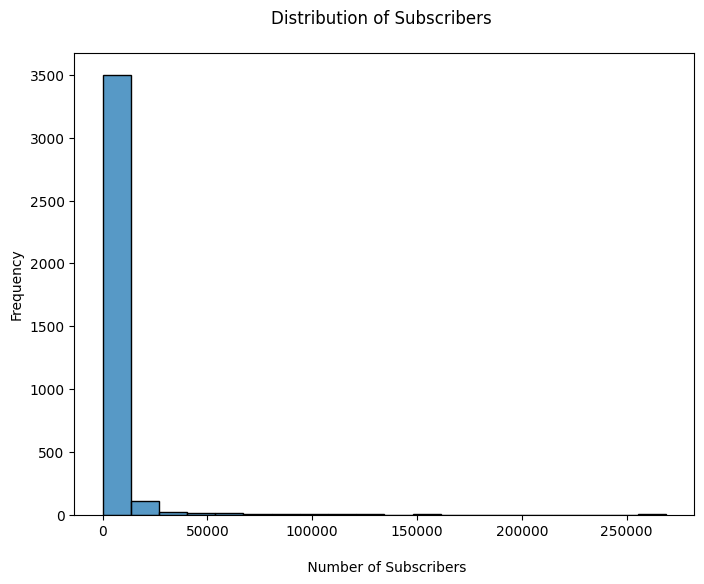

In [155]:
# Distribution of Subscribers
plt.figure(figsize=(8, 6))
sns.histplot(df['num_subscribers'], bins=20)
plt.xlabel('\n Number of Subscribers')
plt.ylabel('Frequency')
plt.title('Distribution of Subscribers \n')
plt.show()

In [156]:
# Courses with more than 10,000 subscribers
data_morethan_10000sub = df[df['num_subscribers'] > 10000][['course_title','num_subscribers']]
data_morethan_10000sub

,course_title,num_subscribers
22,Create A Business From Home Trading Stocks Tod...,10149
36,Forex Trading A-Z™ - With LIVE Examples of For...,16900
37,"Introduction to Finance, Accounting, Modeling ...",11441
38,Beginner to Pro in Excel: Financial Modeling a...,22257
40,The Complete Financial Analyst Course 2017,24481
...,...,...
3539,ASP.Net MVC Quick Start,15092
3560,JavaScript for Absolute Beginners,10689
3590,Become Exceptional in HTML and HTML5,16486
3638,Building a Search Engine in PHP & MySQL,10110


In [157]:
#top 10 courses with more than 10,000 subscribers
top10_data_morethan_10000sub= data_morethan_10000sub.sort_values(by='num_subscribers', ascending=False).head(10)
top10_data_morethan_10000sub

,course_title,num_subscribers
2827,Learn HTML5 Programming From Scratch,268923
3032,Coding for Entrepreneurs Basic,161029
3230,The Web Developer Bootcamp,121584
2783,Build Your First Website in 1 Week with HTML5 ...,120291
3232,The Complete Web Developer Course 2.0,114512
1896,Free Beginner Electric Guitar Lessons,101154
2589,Web Design for Web Developers: Build Beautiful...,98867
2619,Learn Javascript & JQuery From Scratch,84897
3289,Practical PHP: Master the Basics and Code Dyna...,83737
3247,JavaScript: Understanding the Weird Parts,79612


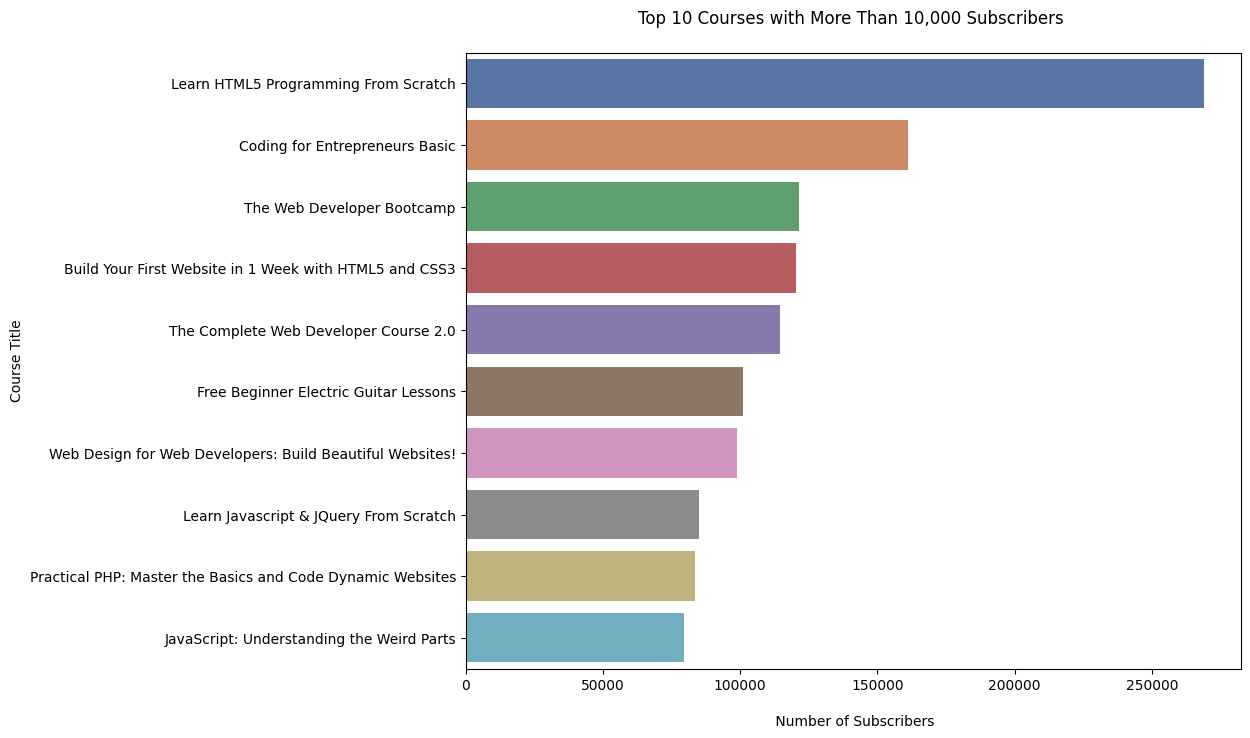

In [158]:
# Visualize top 10 courses with more than 10,000 subscribers
plt.figure(figsize=(10,8))
sns.barplot(y='course_title', x='num_subscribers', data=top10_data_morethan_10000sub, palette='deep')
plt.ylabel('Course Title')
plt.xlabel('\n Number of Subscribers')
plt.title('Top 10 Courses with More Than 10,000 Subscribers \n')
plt.xticks(rotation=-0)
plt.show()

In [159]:
# Average number of subscribers in each subject
avg_subscribers_subject = df.groupby('subject')['num_subscribers'].mean().reset_index()
avg_subscribers_subject

,subject,num_subscribers
0,Business Finance,1569.026868
1,Graphic Design,1766.026578
2,Musical Instruments,1245.130882
3,Web Development,6619.922435


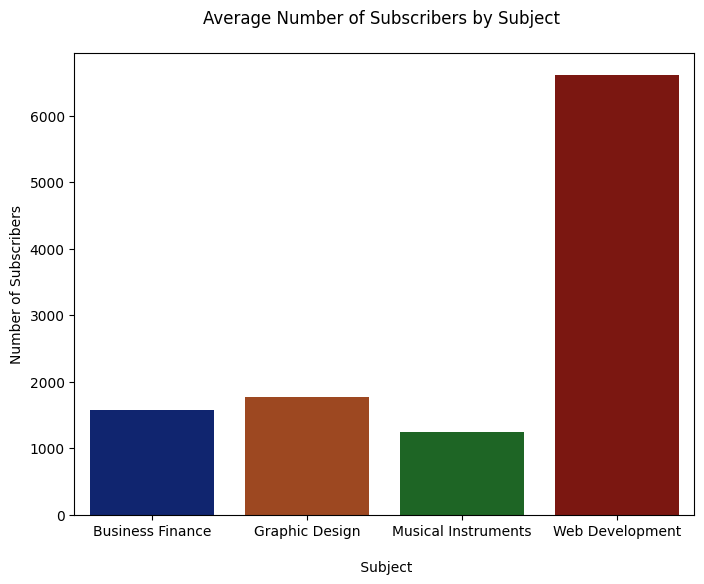

In [160]:
# Visualize average subscribers in each subject
plt.figure(figsize=(8,6))
sns.barplot(x='subject', y='num_subscribers', data=avg_subscribers_subject, palette='dark')
plt.xlabel('\n Subject')
plt.ylabel('Number of Subscribers')
plt.title('Average Number of Subscribers by Subject \n')
plt.xticks(rotation=0)
plt.show()

In [161]:
# Top 10 lectures in the dataset
Top10_lectures = df.sort_values(by='num_lectures', ascending=False).head(10)
Top10_lectures

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2707,Back to School Web Development and Programming...,True,200,18170,117,779,Beginner Level,44.5,2013-08-19T14:53:00Z,Web Development
160,Learn to Trade The News,True,200,1924,351,544,All Levels,46.5,2015-07-16T22:03:29Z,Business Finance
2748,"Thoughtful Web Development Course: HTML, Vue.j...",True,200,842,144,536,All Levels,25.0,2016-10-11T14:18:27Z,Web Development
561,Financial Management - A Complete Study,True,190,1941,128,527,All Levels,71.5,2014-12-22T16:57:30Z,Business Finance
3004,Code & Grow Rich: Earn More As An Entrepreneu...,True,200,7211,52,491,All Levels,57.0,2016-02-10T01:09:19Z,Web Development
114,Advanced Accounting A Complete Study for CA / ...,True,150,1535,16,462,All Levels,62.0,2016-06-03T17:42:27Z,Business Finance
655,MCA Accountancy and Financial Management -Pape...,True,180,3667,4,460,All Levels,43.5,2014-12-06T16:34:03Z,Business Finance
3501,Learn to build 20 websites and build 14 iOS9 a...,True,40,1926,9,458,All Levels,22.5,2015-07-24T21:45:40Z,Web Development
2613,Become a Professional Web Developer | Version 3.0,True,200,6851,276,454,All Levels,60.0,2014-01-21T12:31:24Z,Web Development
870,Cost Accounting and Financial Management - A C...,True,150,452,14,444,All Levels,45.0,2016-03-04T17:04:28Z,Business Finance


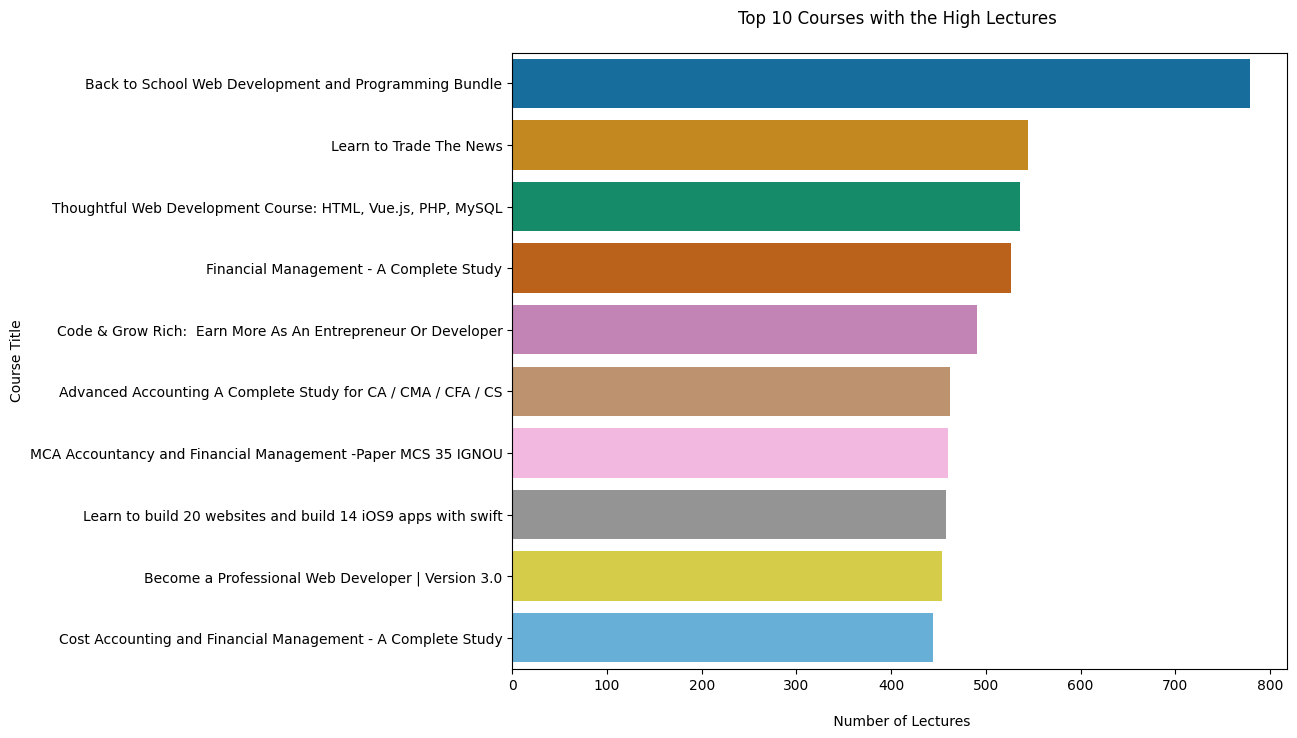

In [162]:
# Visualize top 10 courses with high lectures
plt.figure(figsize=(10,8))
sns.barplot(x='num_lectures', y='course_title', data=Top10_lectures,palette='colorblind' )
plt.xlabel('\n Number of Lectures')
plt.ylabel('Course Title')
plt.title('Top 10 Courses with the High Lectures \n')
plt.show()

In [163]:
# Average content duration for all courses
avg_content_duration = df['content_duration'].mean()
avg_content_duration

4.09760348583878

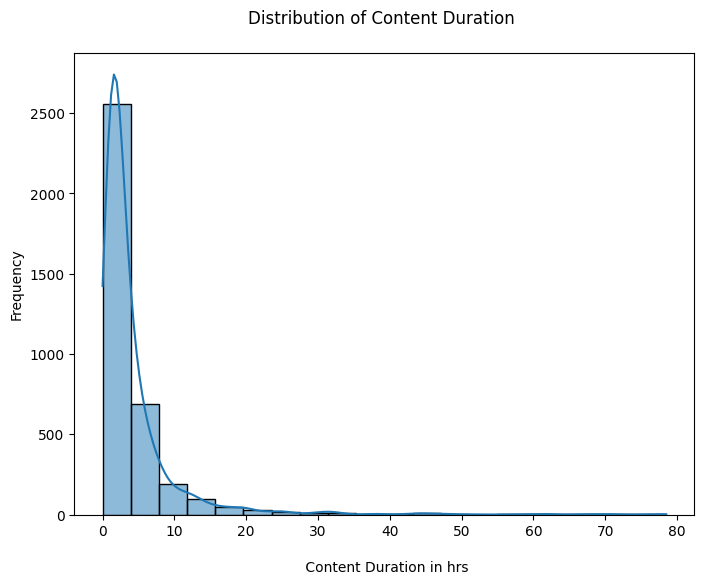

In [164]:
# Distribution of Content Duration
plt.figure(figsize=(8,6))
sns.histplot(df['content_duration'], bins=20, kde=True )
plt.xlabel('\n Content Duration in hrs')
plt.ylabel('Frequency')
plt.title('Distribution of Content Duration \n')
plt.show()

In [165]:
# Converting 'published_timestamp' type to date format
df['published_timestamp'] = pd.to_datetime(df['published_timestamp'])
df['published_timestamp'].dtype

datetime64[ns, UTC]

In [166]:
#Creating 'Year' Feature by using 'published_timestamp' feature
df['Year'] = df['published_timestamp'].dt.year
df.head(2)

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,Year
0,Ultimate Investment Banking Course,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance,2017
1,Complete GST Course & Certification - Grow You...,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance,2017


In [167]:
# Number of courses published in each year
df.Year.value_counts()

2016    1204
2015    1014
2017     713
2014     490
2013     201
2012      45
2011       5
Name: Year, dtype: int64

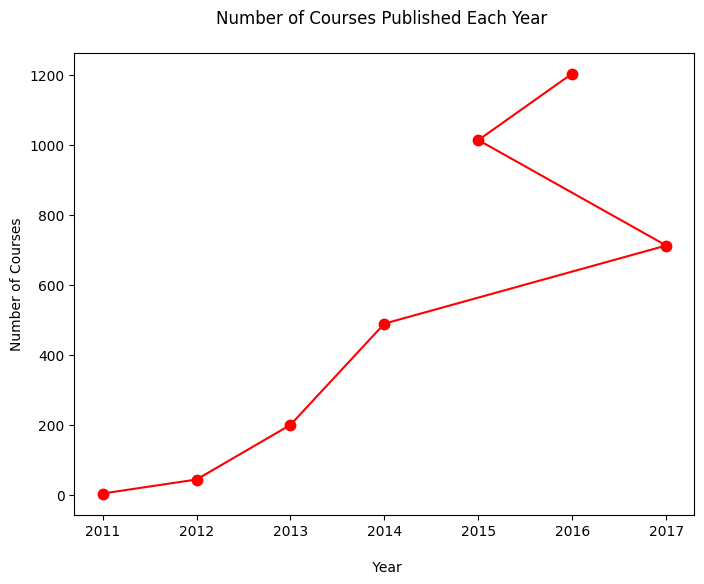

In [168]:
#Visualize No. of courses in published in each year
plt.figure(figsize=(8,6))
df['Year'].value_counts().plot.line(marker='.',markersize=15, color='red')
plt.xlabel('\n Year')
plt.ylabel('Number of Courses')
plt.title('Number of Courses Published Each Year \n')
plt.show()

In [169]:
# Top 10 highest-priced courses based on subscribers
Max_price = df[df['price'] == df['price'].max()]
Max_price

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,Year
0,Ultimate Investment Banking Course,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance,2017
4,How To Maximize Your Profits Trading Options,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance,2016
9,The Only Investment Strategy You Need For Your...,True,200,827,14,15,All Levels,1.0,2017-04-18 18:13:32+00:00,Business Finance,2017
10,Forex Trading Secrets of the Pros With Amazon'...,True,200,4284,93,76,All Levels,5.0,2015-09-11 16:47:02+00:00,Business Finance,2015
11,Trading Options With Money Flow,True,200,1380,42,17,All Levels,1.0,2016-10-18 22:52:31+00:00,Business Finance,2016
...,...,...,...,...,...,...,...,...,...,...,...
3592,Spring 4 Mastercourse: Covers Annotation & XML...,True,200,1353,53,320,Intermediate Level,23.5,2016-11-01 22:08:04+00:00,Web Development,2016
3620,Learning Path: The Road to Elasticsearch,True,200,50,5,60,Beginner Level,5.0,2017-05-29 17:56:24+00:00,Web Development,2017
3642,Learn Web Development by Creating a Social Net...,True,200,442,48,80,Beginner Level,6.5,2015-12-30 16:53:44+00:00,Web Development,2015
3652,Learn Bootstrap 4 The Most Popular HTML5 CSS3 ...,True,200,279,37,119,All Levels,10.0,2017-04-25 00:57:35+00:00,Web Development,2017


In [170]:
Top10_Max_price = Max_price.sort_values(by='num_subscribers',ascending=False).head(10)
Top10_Max_price

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,Year
3230,The Web Developer Bootcamp,True,200,121584,27445,342,All Levels,43.0,2015-11-02 21:13:27+00:00,Web Development,2015
3232,The Complete Web Developer Course 2.0,True,200,114512,22412,304,All Levels,30.5,2016-03-08 22:28:36+00:00,Web Development,2016
1979,Pianoforall - Incredible New Way To Learn Pian...,True,200,75499,7676,362,All Levels,30.0,2014-08-07 06:27:51+00:00,Musical Instruments,2014
1213,Photoshop for Entrepreneurs - Design 11 Practi...,True,200,36288,737,63,All Levels,5.0,2016-06-09 01:57:03+00:00,Graphic Design,2016
3233,Ultimate Web Designer & Developer Course: Buil...,True,200,33788,4434,246,All Levels,32.5,2015-08-20 20:55:19+00:00,Web Development,2015
3206,PHP for Beginners -Become a PHP Master - Proje...,True,200,28880,4316,286,All Levels,30.5,2015-02-14 00:54:08+00:00,Web Development,2015
2621,The Ultimate Web Developer How To Guide,True,200,24861,423,281,All Levels,22.5,2015-11-26 04:31:11+00:00,Web Development,2015
1526,How To Make Graphics For A Website,True,200,24857,35,11,All Levels,1.5,2014-03-15 21:53:19+00:00,Graphic Design,2014
3117,1 Hour JavaScript,True,200,22999,602,18,Beginner Level,1.0,2013-07-04 15:27:02+00:00,Web Development,2013
2755,Become A Web Developer And Seller - Build Webs...,True,200,21730,61,35,Beginner Level,2.5,2013-10-05 12:49:46+00:00,Web Development,2013


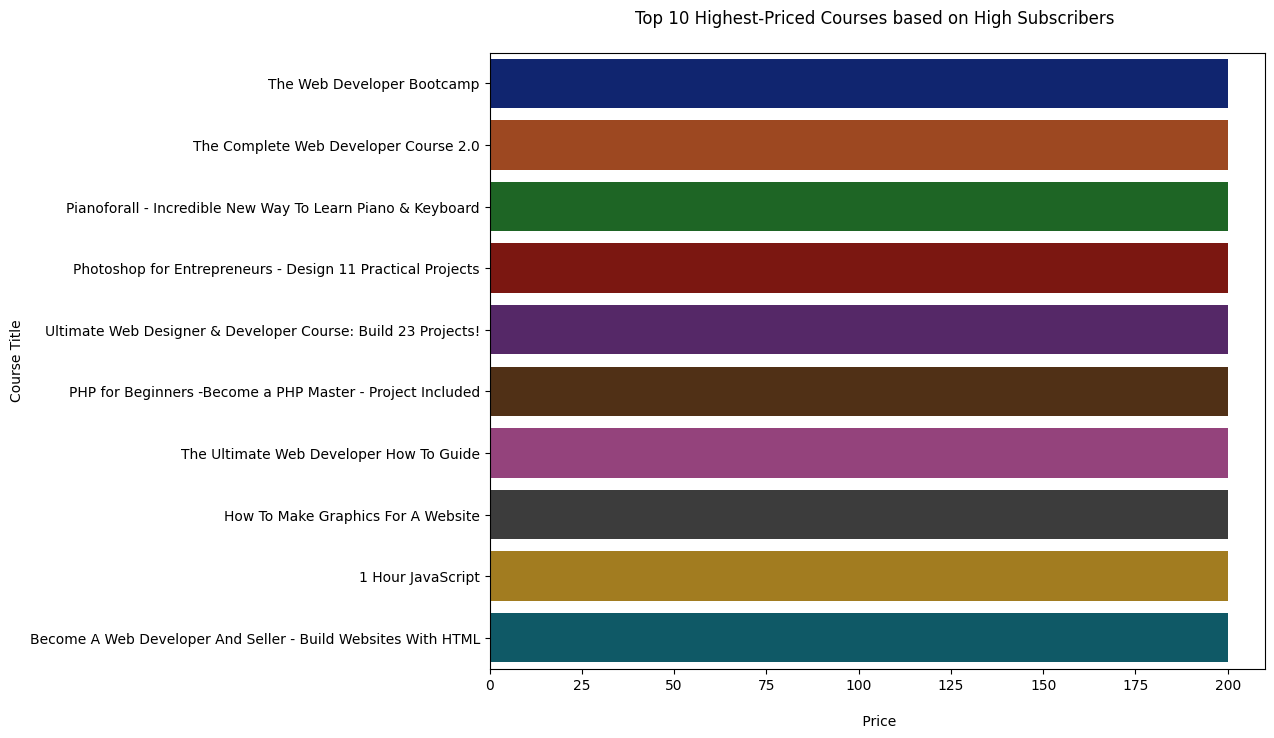

In [171]:
# Visualize top 10 highest-priced courses based on High subscribers
plt.figure(figsize=(10,8))
sns.barplot(x='price', y='course_title', data=Top10_Max_price, palette='dark')
plt.xlabel('\n Price')
plt.ylabel('Course Title')
plt.title('Top 10 Highest-Priced Courses based on High Subscribers \n')
plt.xticks(rotation=0)
plt.show()

In [172]:
# Average number of lectures for each level
avg_lectures_based_level=df.groupby('level')['num_lectures'].mean().reset_index()
avg_lectures_based_level

,level,num_lectures
0,All Levels,46.030649
1,Beginner Level,33.022082
2,Expert Level,30.775862
3,Intermediate Level,35.935867


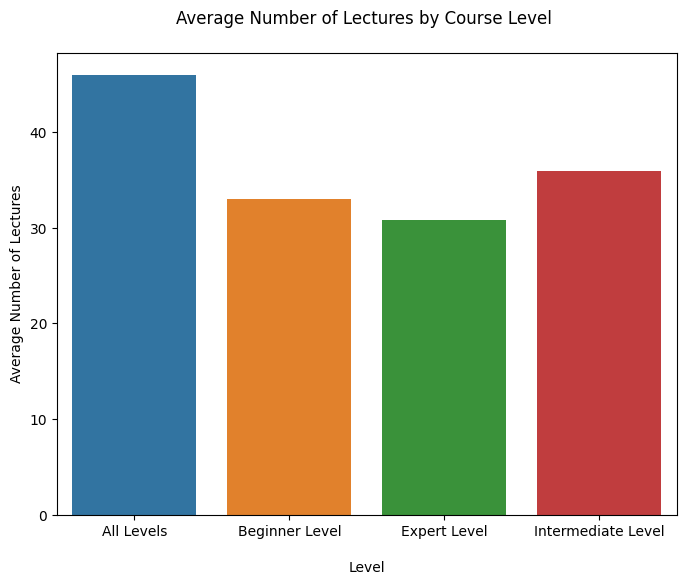

In [173]:
# Visualize Average number of lectures for each level
plt.figure(figsize=(8,6))
sns.barplot(x='level', y='num_lectures', data=avg_lectures_based_level, errorbar=None)
plt.xlabel('\nLevel')
plt.ylabel('Average Number of Lectures')
plt.title('Average Number of Lectures by Course Level \n')
plt.show()

In [178]:
# Earliest and Latest Published Timestamp
earliest_timestamp = df['published_timestamp'].min()
latest_timestamp = df['published_timestamp'].max()


print("The Earliest Published Course based on Timestamp is ", earliest_timestamp)
print("The Latest Published Course based on Timestamp is", latest_timestamp)

The Earliest Published Course based on Timestamp is  2011-07-09 05:43:31+00:00
The Latest Published Course based on Timestamp is 2017-07-06 21:46:30+00:00


In [175]:
# Courses containing 'Python' in their title
python_courses = df[df['course_title'].str.contains('Python', case=False)]
python_courses.head()

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,Year
14,Python Algo Trading: Sentiment Trading with News,True,200,294,19,42,All Levels,7.0,2017-04-28 16:41:44+00:00,Business Finance,2017
30,Python Algo Stock Trading: Automate Your Trading!,True,95,1165,21,41,Beginner Level,2.5,2017-05-28 23:41:03+00:00,Business Finance,2017
41,Python for Finance: Investment Fundamentals & ...,True,195,3811,278,103,All Levels,6.5,2017-03-30 22:17:09+00:00,Business Finance,2017
147,Python Algo Trading: FX Trading with Oanda,True,200,453,42,33,Intermediate Level,3.0,2017-03-14 00:39:45+00:00,Business Finance,2017
334,Stock Technical Analysis with Python,True,50,409,35,46,All Levels,8.0,2016-04-12 00:40:03+00:00,Business Finance,2016


In [176]:
len(python_courses)

29

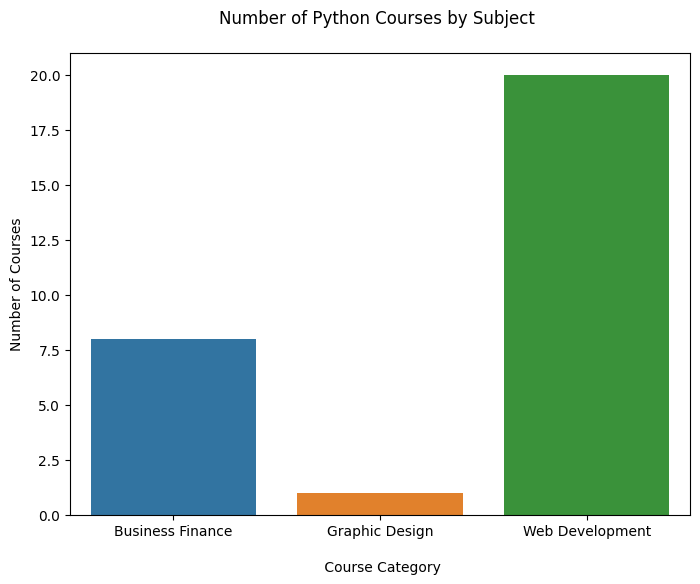

In [177]:
# visualize the number of Python courses by using countplot
plt.figure(figsize=(8, 6))
sns.countplot(x='subject', data=python_courses)
plt.xlabel('\n Course Category')
plt.ylabel('Number of Courses')
plt.title('Number of Python Courses by Subject \n')
plt.show()

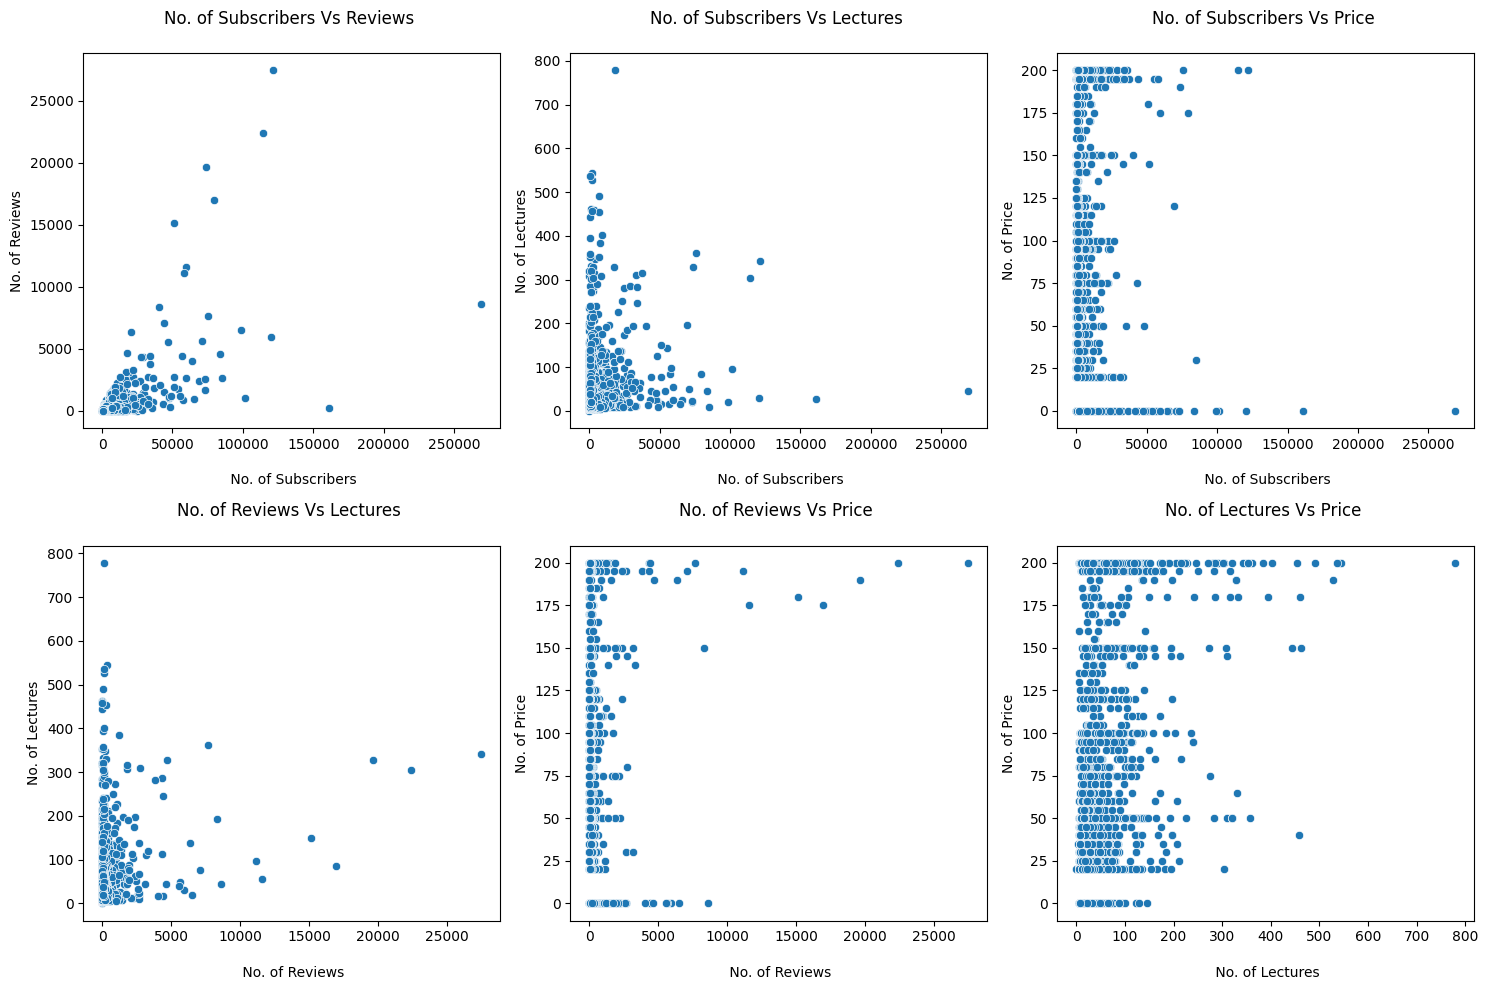

In [190]:
plt.figure(figsize=(15, 10))

plt.subplot(231)
sns.scatterplot(x='num_subscribers', y='num_reviews', data=df)
plt.title("No. of Subscribers Vs Reviews \n")
plt.xlabel('\n No. of Subscribers')
plt.ylabel('No. of Reviews')

plt.subplot(232)
sns.scatterplot(x='num_subscribers', y='num_lectures', data=df)
plt.title("No. of Subscribers Vs Lectures \n")
plt.xlabel('\n No. of Subscribers')
plt.ylabel('No. of Lectures')

plt.subplot(233)
sns.scatterplot(x='num_subscribers', y='price', data=df)
plt.title("No. of Subscribers Vs Price \n")
plt.xlabel('\n No. of Subscribers')
plt.ylabel('No. of Price')

plt.subplot(234)
sns.scatterplot(x='num_reviews', y='num_lectures', data=df)
plt.title("No. of Reviews Vs Lectures \n")
plt.xlabel('\n No. of Reviews')
plt.ylabel('No. of Lectures')

plt.subplot(235)
sns.scatterplot(x='num_reviews', y='price', data=df)
plt.title("No. of Reviews Vs Price \n")
plt.xlabel('\n No. of Reviews')
plt.ylabel('No. of Price')

plt.subplot(236)
sns.scatterplot(x='num_lectures', y='price', data=df)
plt.title("No. of Lectures Vs Price \n")
plt.xlabel('\n No. of Lectures')
plt.ylabel('No. of Price')

plt.tight_layout()
plt.show()

## **Project Summary**

## This project's core objective is to thoroughly analyze the Udemy dataset, focusing on critical aspects such as course popularity, pricing strategies, subject preferences, and temporal trends. Through the application of data visualization techniques, we aim to provide a comprehensive overview of Udemy's course landscape. The resulting insights are anticipated to benefit learners, instructors, and stakeholders in the online education domain by delivering valuable, data-driven perspectives.